In [22]:
import numpy as np
import pandas as pd
import difflib
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Data Collection

In [23]:
musicArtist_data = pd.read_csv('artists.csv',encoding='latin1')
musicArtist_data

,Index,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,e4d00c8e-5b9d-40cc-b7c8-c8690af2f49e,Cindy Bortman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1048571,1048571,f74321a6-0cff-4812-94d0-318ca8f429ec,Cindy Breakspeare,NaN,Jamaica,NaN,NaN,NaN,NaN,NaN,False
1048572,1048572,7e810fc3-d534-4964-8681-9edc34c5db9f,Cindy Brown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1048573,1048573,a4b32362-731e-4205-97c4-f4c5953ee70f,Cindy Browne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [24]:
musicArtist_data.head(2)

,Index,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False


In [25]:
musicArtist_data.shape

(1048575, 11)

Data Filtering

In [26]:
musicArtists_data=musicArtist_data.iloc[0:15000]

In [27]:
musicArtists_data.shape

(15000, 11)

In [28]:
musicArtists_data['artist_mb'].duplicated().sum()

2093

In [29]:
musicArtists_data=musicArtists_data.drop_duplicates(subset='artist_mb',keep='first')

In [30]:
musicArtists_data['artist_mb'].duplicated().sum()

0

In [31]:
musicArtists_data.shape

(12907, 11)

In [33]:
musicArtists_data

,Index,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False
...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,be39fc72-da2a-4864-8ed2-d181cb714af1,The Departure,The Departure,United Kingdom,United Kingdom,post-punk; rock and indie,indie rock; indie; post-punk; british; rock,72008.0,709904.0,False
14996,14996,cafba612-fca3-4bac-b235-35ab7dbff2bb,Emerson Hart,Emerson Hart,United States,United States,NaN,singer-songwriter; alternative; indie; rock; a...,72000.0,564287.0,False
14997,14997,092da447-423a-4147-ab49-34e91554997e,Empire! Empire! (I Was a Lonely Estate),Empire! Empire! (I Was a Lonely Estate),United States,United States,NaN,emo; midwest emo; indie; indie rock; post-emo ...,71988.0,3406043.0,False
14998,14998,29615e2a-ee44-4f4b-9cb9-6ab408770c8f,Hamilton,Hamilton,NaN,United Kingdom,NaN,Drum and bass; Drum n Bass; jump-up; dnb; elec...,71985.0,344978.0,False


In [11]:
musicArtists_data.tags_mb = musicArtists_data.tags_mb.str.replace(" ","")
musicArtists_data.tags_lastfm = musicArtists_data.tags_lastfm.str.replace(" ","")

In [12]:
musicArtists_data["tags_mb"].head()

0    rock;pop;alternativerock;british;uk;britanniqu...
1    rock;electronic;alternativerock;british;grunge...
2    rock;alternativerock;80s;90s;rap;metal;america...
3    pop;dance;hiphop;reggae;contemporaryrb;electro...
4    turkish;rap;american;hip-hop;hiphop;hiphop;mid...
Name: tags_mb, dtype: object

In [13]:
musicArtists_data["tags_lastfm"].head()

0    rock;alternative;britpop;alternativerock;indie...
1    alternative;alternativerock;rock;indie;electro...
2    rock;alternativerock;alternative;FunkRock;funk...
3    pop;rnb;femalevocalists;dance;Hip-Hop;Rihanna;...
4    rap;Hip-Hop;Eminem;hiphop;pop;american;detroit...
Name: tags_lastfm, dtype: object

In [14]:
selected_features=['artist_mb','tags_lastfm','country_mb']
print (selected_features)

['artist_mb', 'tags_lastfm', 'country_mb']


In [15]:
for features in selected_features:
  musicArtists_data[features] = musicArtists_data[features].fillna('')

In [16]:
combined_features = musicArtists_data['country_mb']+' '+musicArtists_data['tags_lastfm']

In [17]:
print(combined_features)

0        United Kingdom rock;alternative;britpop;altern...
1        United Kingdom alternative;alternativerock;roc...
2        United States rock;alternativerock;alternative...
3        United States pop;rnb;femalevocalists;dance;Hi...
4        United States rap;Hip-Hop;Eminem;hiphop;pop;am...
                               ...                        
14995    United Kingdom indierock;indie;post-punk;briti...
14996    United States singer-songwriter;alternative;in...
14997    United States emo;midwestemo;indie;indierock;p...
14998     Drumandbass;DrumnBass;jump-up;dnb;electronic;...
14999    United States singer-songwriter;acoustic;folk;...
Length: 12907, dtype: object


EDA

In [36]:
musicArtists_data.head()

,Index,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


In [35]:
musicArtists_data.describe()

,Index,listeners_lastfm,scrobbles_lastfm
count,12907.00000,1.290700e+04,1.290700e+04
mean,7304.85566,2.940775e+05,6.781010e+06
std,4382.42684,4.116401e+05,1.872325e+07
min,0.00000,7.197800e+04,1.866180e+05
25%,3447.00000,9.835150e+04,1.005051e+06
50%,7198.00000,1.500880e+05,2.061782e+06
75%,11108.50000,2.989175e+05,5.150175e+06
max,14999.00000,5.381567e+06,5.171263e+08


In [38]:
pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 759.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


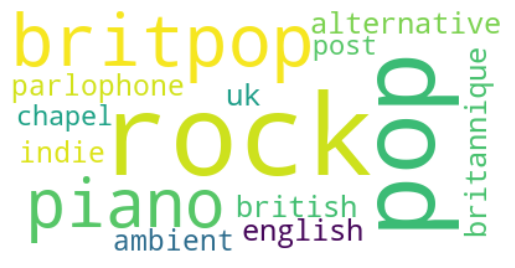

In [42]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
text = musicArtists_data.tags_mb[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 0, 'Listener count')

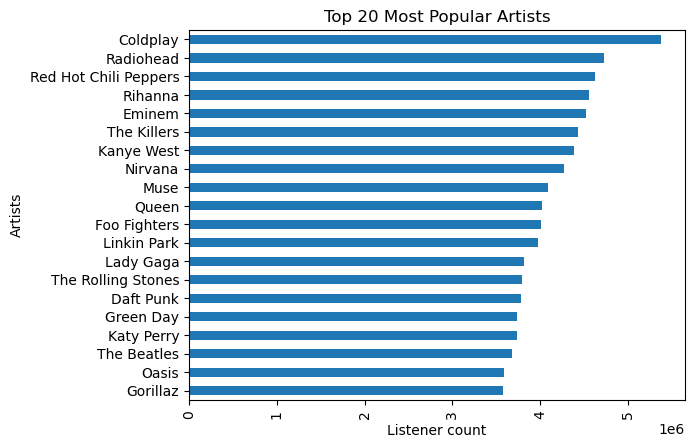

In [49]:
popular_artist = musicArtists_data[['artist_mb','listeners_lastfm']].groupby('artist_mb').sum().sort_values('listeners_lastfm', 
ascending=False).head(20).sort_values('listeners_lastfm')
f1 = popular_artist.plot(kind='barh', title='Top 20 Most Popular Artists', legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('Artists')
plt.xlabel('Listener count')

Text(0.5, 0, 'Listener count')

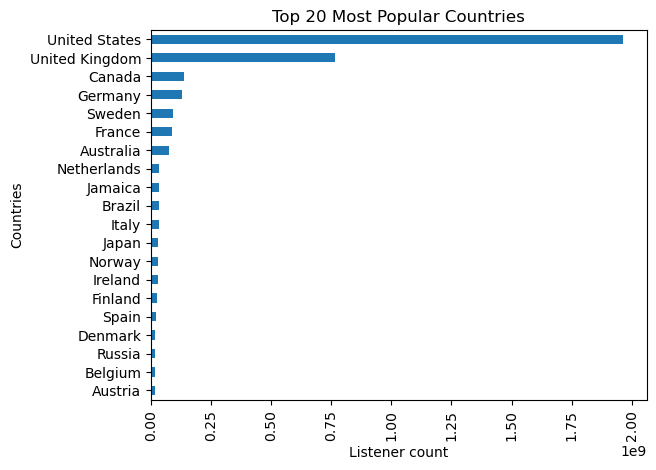

In [48]:
popular_country = musicArtists_data[['country_mb','listeners_lastfm']].groupby('country_mb').sum().sort_values('listeners_lastfm', 
ascending=False).head(20).sort_values('listeners_lastfm')
f1 = popular_country.plot(kind='barh', title='Top 20 Most Popular Countries', legend=False)
plt.xticks(rotation='vertical')
plt.ylabel('Countries')
plt.xlabel('Listener count')

Vectorizing the data

In [52]:
vectorizer = TfidfVectorizer()

In [53]:
feature_vector = vectorizer.fit_transform(combined_features)

In [54]:
print (feature_vector)

  (0, 47809)	0.16515680984515485
  (0, 19504)	0.1681434670062171
  (0, 950)	0.09665883319130468
  (0, 42998)	0.2250599472514347
  (0, 8574)	0.4196387868422918
  (0, 17309)	0.07201684530841274
  (0, 11413)	0.11215104251311775
  (0, 34355)	0.11903214904736939
  (0, 17932)	0.12155741147126811
  (0, 17777)	0.12317654122098538
  (0, 53213)	0.08848467678444243
  (0, 51996)	0.08832498338364296
  (0, 1388)	0.10605140201369223
  (0, 27837)	0.10255564710777271
  (0, 19434)	0.114766786667646
  (0, 10551)	0.11481313774706126
  (0, 14)	0.08707151852416894
  (0, 44154)	0.13807968113996325
  (0, 10616)	0.09452823804356421
  (0, 35288)	0.08139698438734676
  (0, 36428)	0.12629388515626652
  (0, 52868)	0.14273535379010835
  (0, 59473)	0.11460501094961087
  (0, 44192)	0.20835960193056266
  (0, 45076)	0.11102404676953431
  :	:
  (12906, 2548)	0.10148257260299443
  (12906, 56229)	0.14820881179420725
  (12906, 16874)	0.10090430391827868
  (12906, 20730)	0.06473080745518761
  (12906, 20630)	0.093918471728974

Cosine Similarity

In [55]:
similarity = cosine_similarity(feature_vector)

In [56]:
similarity[1]

array([0.34539199, 1.        , 0.14330837, ..., 0.18884661, 0.05269156,
       0.04332834])

In [57]:
pickle.dump(similarity,open('similarityscores.pkl','wb'))

In [58]:
similarity1 = pickle.load(open('similarityscores.pkl','rb'))

Recommendation Function

In [59]:
def recommend(musicArtist):
   musicArtist_name = musicArtist
   list_of_artist_name=musicArtists_data['artist_mb'].tolist()
   find_close_match=difflib.get_close_matches(musicArtist_name,list_of_artist_name)
   close_match=find_close_match[0]
   print(close_match)

   musicArtist_index = musicArtists_data[musicArtists_data['artist_mb'] == close_match].index[0]
   distances = similarity[musicArtist_index]
   musicArtists_list = sorted(list(enumerate(distances)),key = lambda x:x[1],reverse = True)[1:30]

   for i in musicArtists_list:
     print(musicArtists_data.iloc[i[0]].artist_mb)

In [60]:
recommend('arctic monkeys')

Arctic Monkeys
Razorlight
Dirty Pretty Things
Babyshambles
Kaiser Chiefs
HardâFi
Editors
Oasis
Supergrass
MaxÃ¯mo Park
Blur
Kasabian
Bloc Party
Franz Ferdinand
Little Man Tate
Graham Coxon
Milburn
Art Brut
Athlete
British Sea Power
Stereophonics
Nine Black Alps
Doves
Starsailor
Idlewild
Elastica
Feeder
Placebo
Ash
Mystery Jets
